#### 载入依赖项

In [1]:
# coding: utf-8
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import matplotlib.pyplot as plt
import tensorflow as tf

#### 读取图片并显示

(172, 678, 3)
uint8


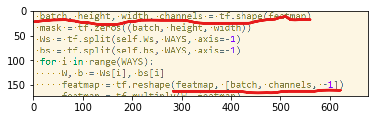

In [2]:
image_value = tf.read_file('1.png')
img = tf.image.decode_jpeg(image_value, channels=3)
 
with tf.Session() as sess:
    img_ = img.eval()
    print(img_.shape)
    print(img_.dtype)

plt.figure(1)
plt.imshow(img_)
plt.show()

#### shape变化并变回来（作废）

(172, 678, 3)
uint8


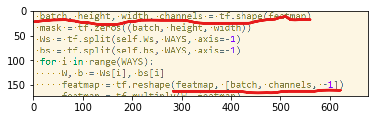

In [3]:
featmap = tf.reshape(img_, [3, -1])
image = tf.reshape(featmap, [172, 678, 3])

with tf.Session() as sess:
    image_ = image.eval()
    print(image_.shape)
    print(image_.dtype)
    
plt.figure(2)
plt.imshow(image_)
plt.show()

#### 定义点积的权重和偏置

In [20]:
ws=tf.constant([[1,0,0,1,1],
                [0,1,0,1,0],
                [0,0,1,0,1]], dtype='uint8')
#create batch
ws = tf.expand_dims(ws, 0)
ws = tf.concat([ws, ws, ws, ws], 0)
bs=tf.constant([[1,2,3,4,5]], dtype='uint8')
bs = tf.expand_dims(bs, 0)
bs = tf.concat([bs, bs, bs, bs], 0)
# ws:channels * ways
#WAYS = tf.shape(ws)[-1]
WAYS = 5
Ws = tf.split(ws, WAYS, axis=-1)
Bs = tf.split(bs, WAYS, axis=-1)
with tf.Session() as sess:
    #print(featmap.shape)
    print(ws.shape)      #(4, 3, 5)
    #print(w.shape)
    print(bs.shape)      #(4, 1, 5)
    print(Ws)
    print(Bs)

(3, 116616)
(4, 3, 5)
(4, 1, 5)
[<tf.Tensor 'split_10:0' shape=(4, 3, 1) dtype=uint8>, <tf.Tensor 'split_10:1' shape=(4, 3, 1) dtype=uint8>, <tf.Tensor 'split_10:2' shape=(4, 3, 1) dtype=uint8>, <tf.Tensor 'split_10:3' shape=(4, 3, 1) dtype=uint8>, <tf.Tensor 'split_10:4' shape=(4, 3, 1) dtype=uint8>]


#### 模拟点积操作，观察shape
后面的image_compress如果不进行reshape操作的话，与bt相加就会得到(4, 4, 172, 678)的情况， 我也不知道为什么。。。

In [50]:
#shape information
batch = 4
height = 172
width = 678
channels = 3
mask = tf.zeros((batch, height, width, 1), dtype='uint8')
# origin_image_batch
image_o = tf.expand_dims(image, 0)
image_o = tf.concat([image_o, image_o, image_o, image_o], 0)

#dot multiple
for i in range(WAYS):
    w, b = Ws[i], Bs[i]
    wt = tf.reshape(w, [batch, 1, 1, channels])
    bt = tf.reshape(b, [batch, 1, 1, 1])
    image_dot = tf.multiply(wt, image_o)
    image_compress = tf.reduce_sum(image_dot, axis=-1)
    image_compress = tf.reshape(image_compress, [batch, height, width, 1])
    image_add = image_compress + bt
    mask = mask + temp_mask
    with tf.Session() as sess:
        #print(wt.eval())       
        #print(bt.eval())     
        #print(image_o.shape)           #(4, 172, 678, 3)
        #print(wt.shape)                #(4, 1, 1, 3)
        #print(bt.shape)                #(4, 1, 1, 1)
        #print(image_dot.shape)         #(4, 172, 678, 3)
        #print(image_compress.shape)    #(4, 172, 678, 1)
        print(image_add.shape)         #(4, 172, 678, 1)
        print(temp_mask.shape)         #(4, 172, 678, 1)
        print(mask.shape)              #(4, 172, 678, 1)
        
        #plt.figure(3+i)    
        #plt.imshow(image1_)
        #plt.show()
        
mask = mask/WAYS
mask = tf.concat([mask, mask], -1)
with tf.Session() as sess:
    print(mask.shape)          #(4, 172, 678, 2)

(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 1)
(4, 172, 678, 2)


In [48]:
mask = mask/WAYS
mask = tf.concat([mask, mask], -1)
with tf.Session() as sess:
    print(mask.shape)

(4, 172, 678, 2)


In [18]:
image_batch = tf.expand_dims(image, 0)
with tf.Session() as sess:
    print(image_batch.shape)

(1, 172, 678, 3)


In [31]:
batch_image = image_batch
batch_image = tf.concat([batch_image, image_batch], 0)
batch_image = tf.concat([batch_image, image_batch], 0)
with tf.Session() as sess:
    print(batch_image.shape)

(3, 172, 678, 3)
